## Categorical EDA

This project is a classification problem that classifies **4 classes** using a total of **50 integer features.**

I think the core of this project is how to proceed with the **ensemble** based on the **encoding method of integer features**.

**The results of the dimension reduction in the back are interesting, so be sure to take a look.**


- Import Library & Default Setting
- Dataset Check
- Target Distribution
- EDA with the Table
- Distribution Check
- # of Zeros
- Correlation
- Dimension Reduction

## Import Library & Default Setting



In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

- reference : https://www.kaggle.com/subinium/dark-mode-visualization-apple-version

In [ ]:
from cycler import cycler


raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

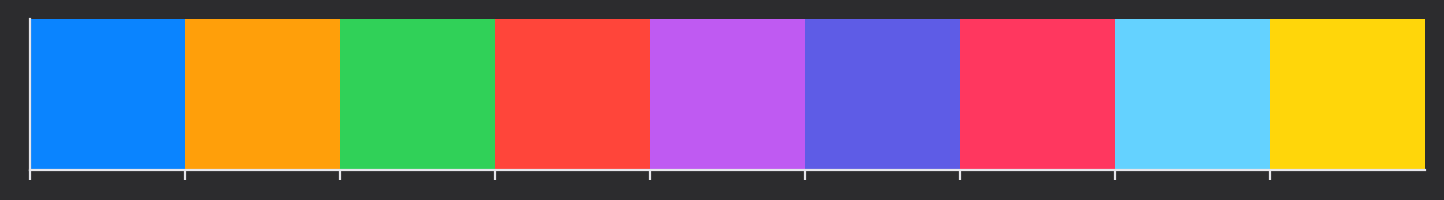

In [ ]:
sns.palplot(dark_palette)

## Dataset Check

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-may-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-may-2021/sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)

(100000, 52)
(50000, 51)


In [ ]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


The id value is meaningless, so I will leave it out in advance.

In [ ]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

## Target Distribution

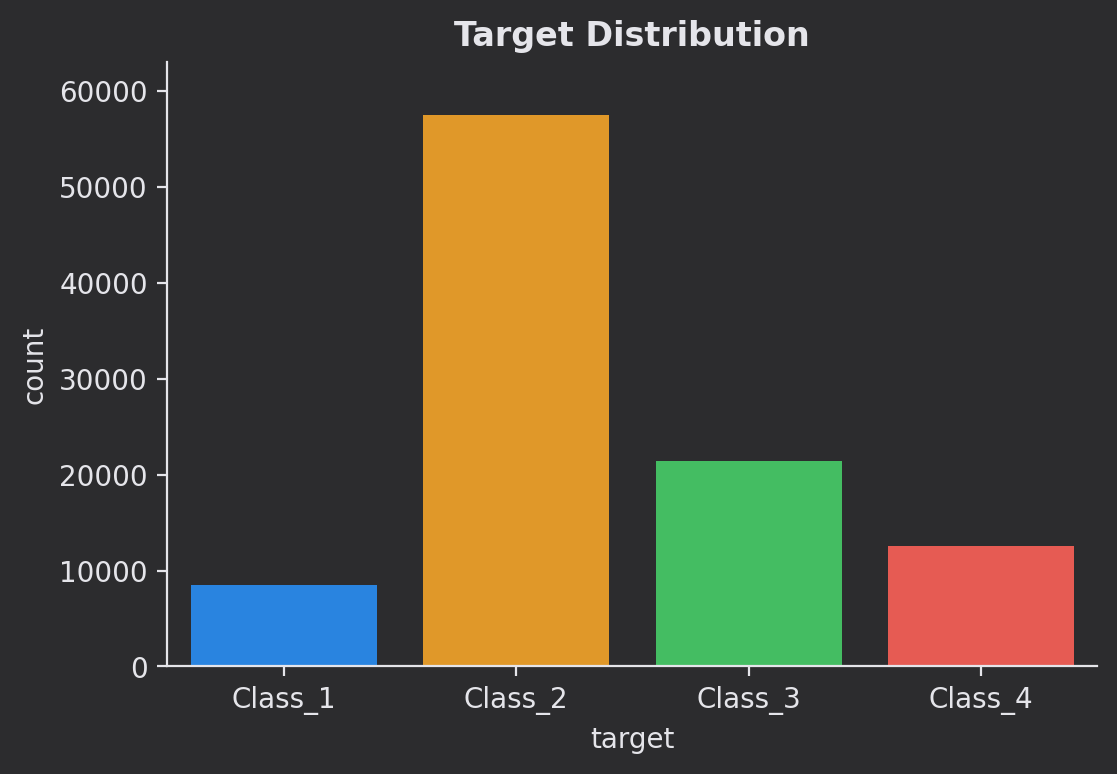

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='target', data=train, order=sorted(train['target'].unique()), ax=ax)
ax.set_ylim(0, 63000)
ax.set_title('Target Distribution', weight='bold')
plt.show()

## EDA with the Table

First, let's look at the statistical values for each feature.

### Train data

In [ ]:
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


### Test data

In [ ]:
test.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
feature_0,50000.000000,0.254620,0.910607,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,50000.000000,0.443480,2.004536,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,50000.000000,0.116720,0.524807,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,50000.000000,0.584440,1.814083,0.000000,0.000000,0.000000,0.000000,25.000000
feature_4,50000.000000,0.612640,2.819580,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,50000.000000,0.161500,0.605760,0.000000,0.000000,0.000000,0.000000,9.000000
feature_6,50000.000000,0.746000,2.352495,0.000000,0.000000,0.000000,0.000000,25.000000
feature_7,50000.000000,1.238040,2.728055,0.000000,0.000000,0.000000,1.000000,29.000000
feature_8,50000.000000,0.886440,3.364154,0.000000,0.000000,0.000000,0.000000,35.000000
feature_9,50000.000000,0.941920,1.913358,0.000000,0.000000,0.000000,1.000000,16.000000


### Comparison of statistics of train and test.

In [ ]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

(train.describe() - test.describe())[test.columns].T.iloc[:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
feature_0,0.003210,0.018426,0.000000,0.000000,0.000000,0.000000,0.000000
feature_1,-0.011760,-0.026675,0.000000,0.000000,0.000000,0.000000,0.000000
feature_2,-0.002590,-0.005223,0.000000,0.000000,0.000000,0.000000,0.000000
feature_3,0.006110,0.030476,0.000000,0.000000,0.000000,0.000000,1.000000
feature_4,-0.012870,-0.034049,0.000000,0.000000,0.000000,0.000000,0.000000
feature_5,-0.000680,-0.004611,0.000000,0.000000,0.000000,0.000000,1.000000
feature_6,-0.014510,-0.009031,0.000000,0.000000,0.000000,0.000000,2.000000
feature_7,-0.009120,-0.035323,0.000000,0.000000,0.000000,0.000000,2.000000
feature_8,0.016910,0.051104,0.000000,0.000000,0.000000,0.000000,4.000000
feature_9,-0.001800,-0.009186,0.000000,0.000000,0.000000,0.000000,1.000000


### Summary

- No missing data
- The scale of the mean and deviation varies.
- The median is mostly 0, and there are 2 columns with median 1.
- The representative statistics of train and test are almost similar.

- There is no significant difference between the mean and the deviation.
- There are cases where the minimum value and the maximum value are different, which means that the feature range of the test may be different in the train.

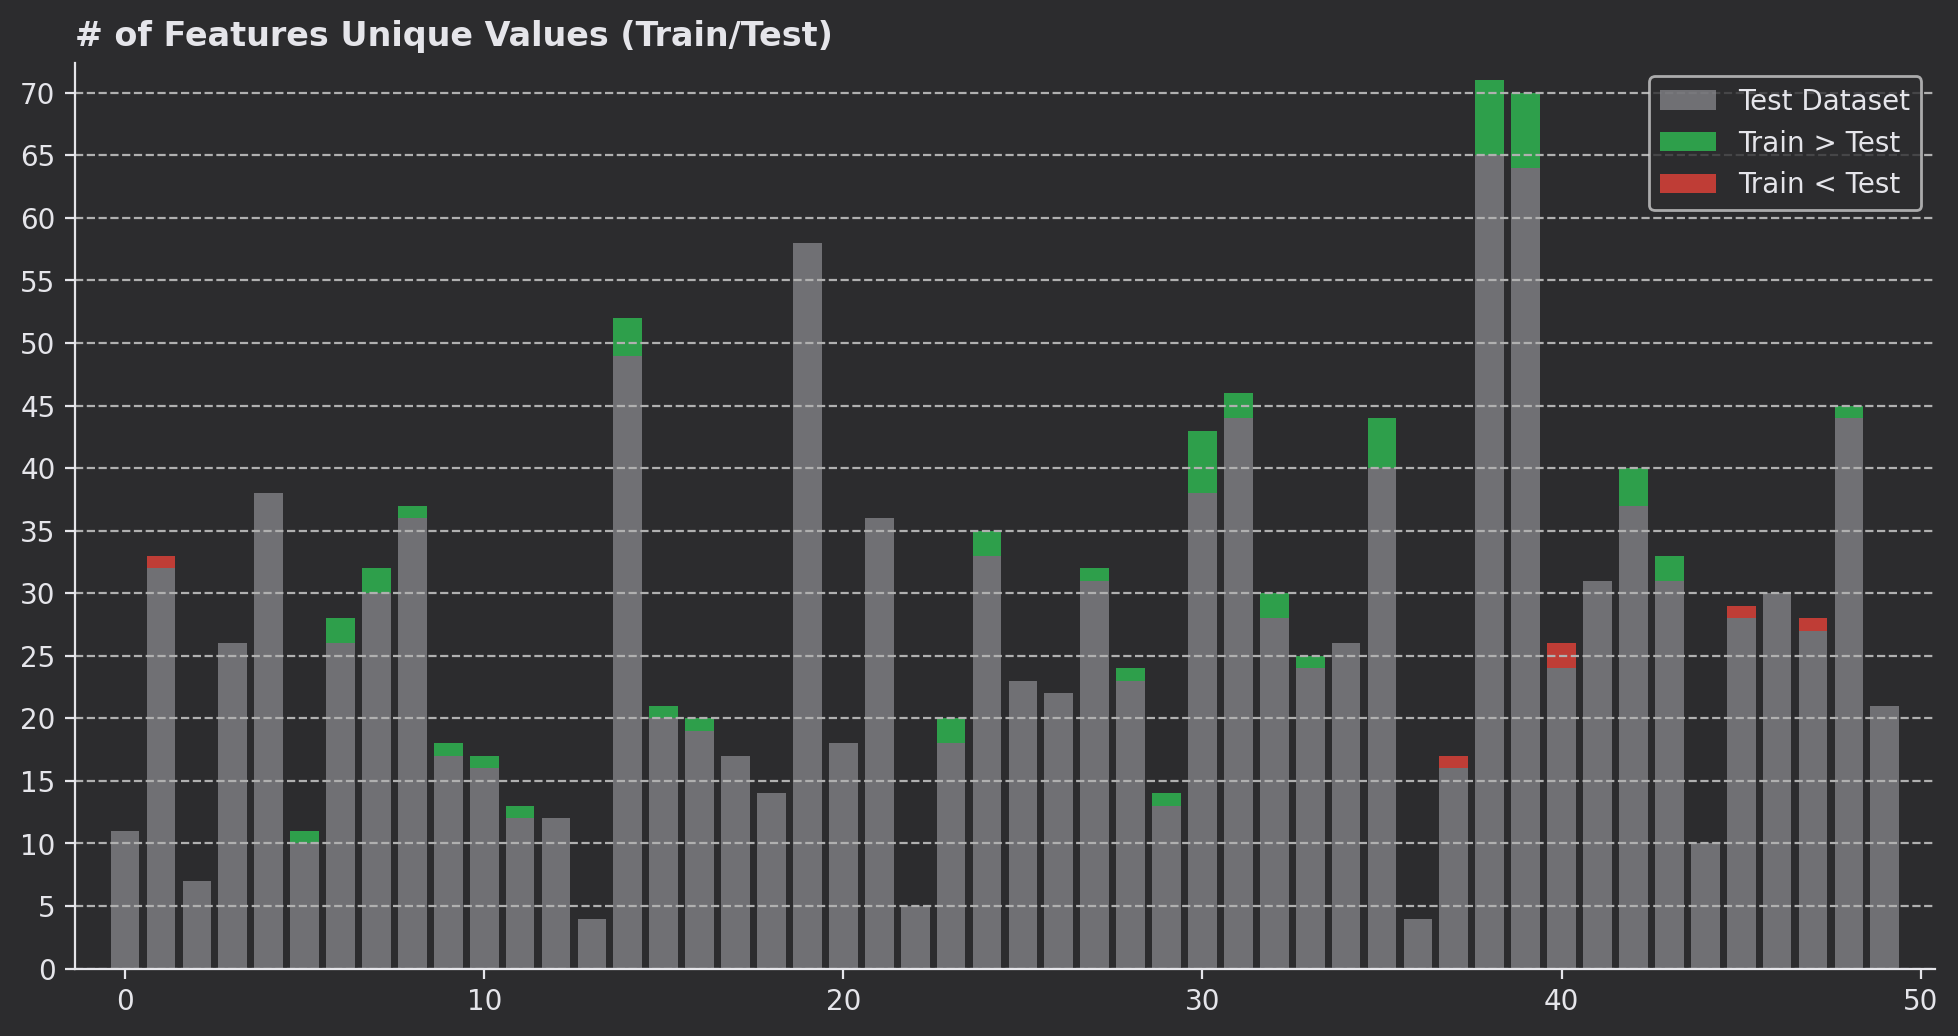

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

y = np.array([train[f'feature_{i}'].nunique() for i in range(50)])
y2 = np.array([test[f'feature_{i}'].nunique() for i in range(50)])
comp = y-y2


ax.bar(range(50), y2, alpha=0.7, color=gray_dark_palette[0], label='Test Dataset')
# Thanks to @rahulchauhan3j to fix typo
ax.bar(range(50),  comp*(comp>0), bottom=y2, color=dark_palette[2], alpha=0.7, label='Train > Test')
ax.bar(range(50), comp*(comp<0), bottom=y2-comp*(comp<0), color=dark_palette[3], alpha=0.7, label='Train < Test')

ax.set_yticks(range(0, 80, 5))
ax.margins(0.02)
ax.grid(axis='y', linestyle='--', zorder=5)
ax.set_title('# of Features Unique Values (Train/Test)', loc='left', fontweight='bold')
ax.legend()
plt.show()

All data in the dataset are integers. Then, a rough look at the number of each integer is as follows.

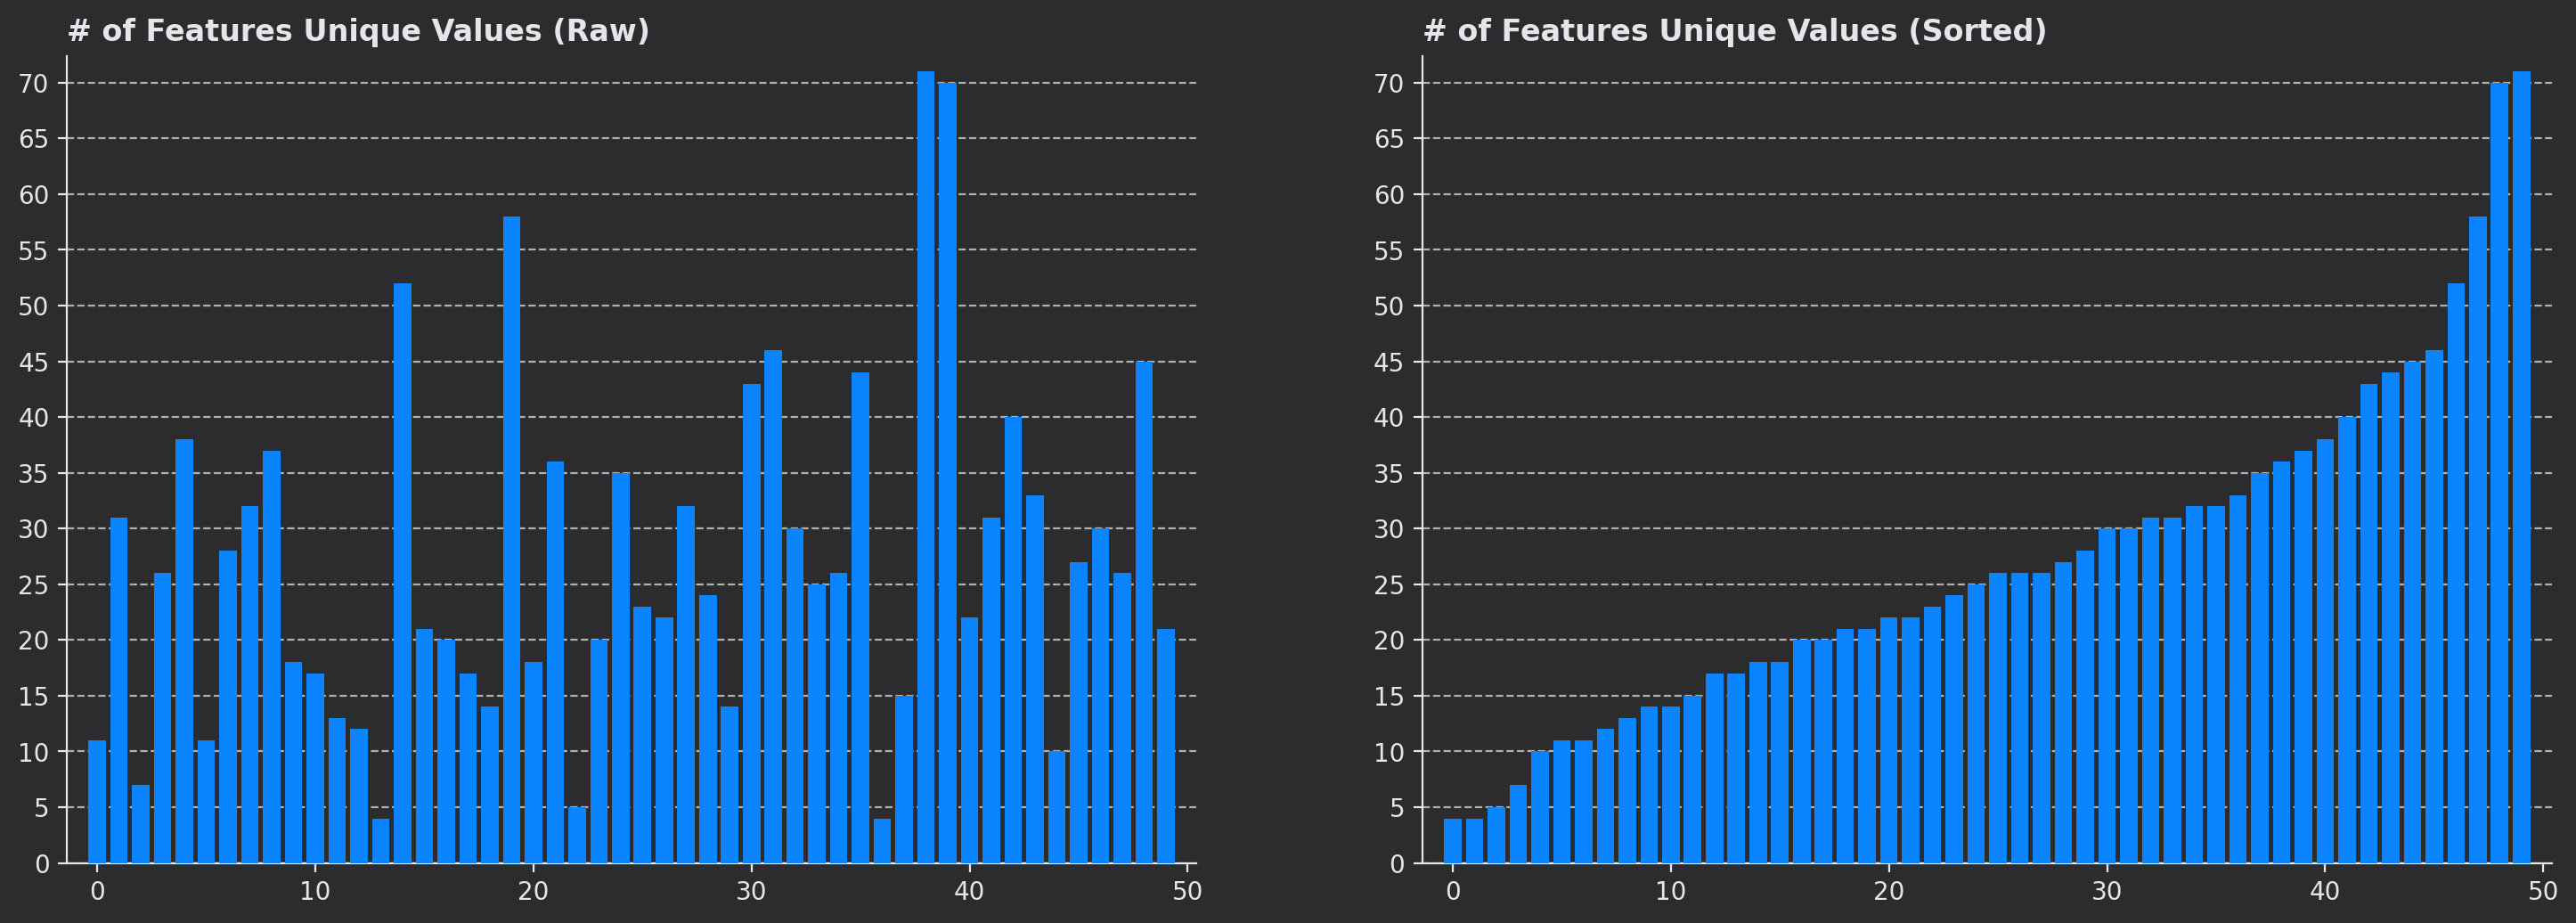

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

y = [train[f'feature_{i}'].nunique() for i in range(50)]

for ax in axes:
    ax.bar(range(50), y, zorder=10)
    ax.set_yticks(range(0, 80, 5))
    ax.margins(0.02)
    ax.grid(axis='y', linestyle='--', zorder=5)
    y.sort()

axes[0].set_title('# of Features Unique Values (Raw)', loc='left', fontweight='bold')
axes[1].set_title('# of Features Unique Values (Sorted)', loc='left', fontweight='bold')

plt.show()

It can range from a fairly small number of features to a large number of features.

In the case of the features that are few here, I think you can think of them as catechical features.

## Distribution Check

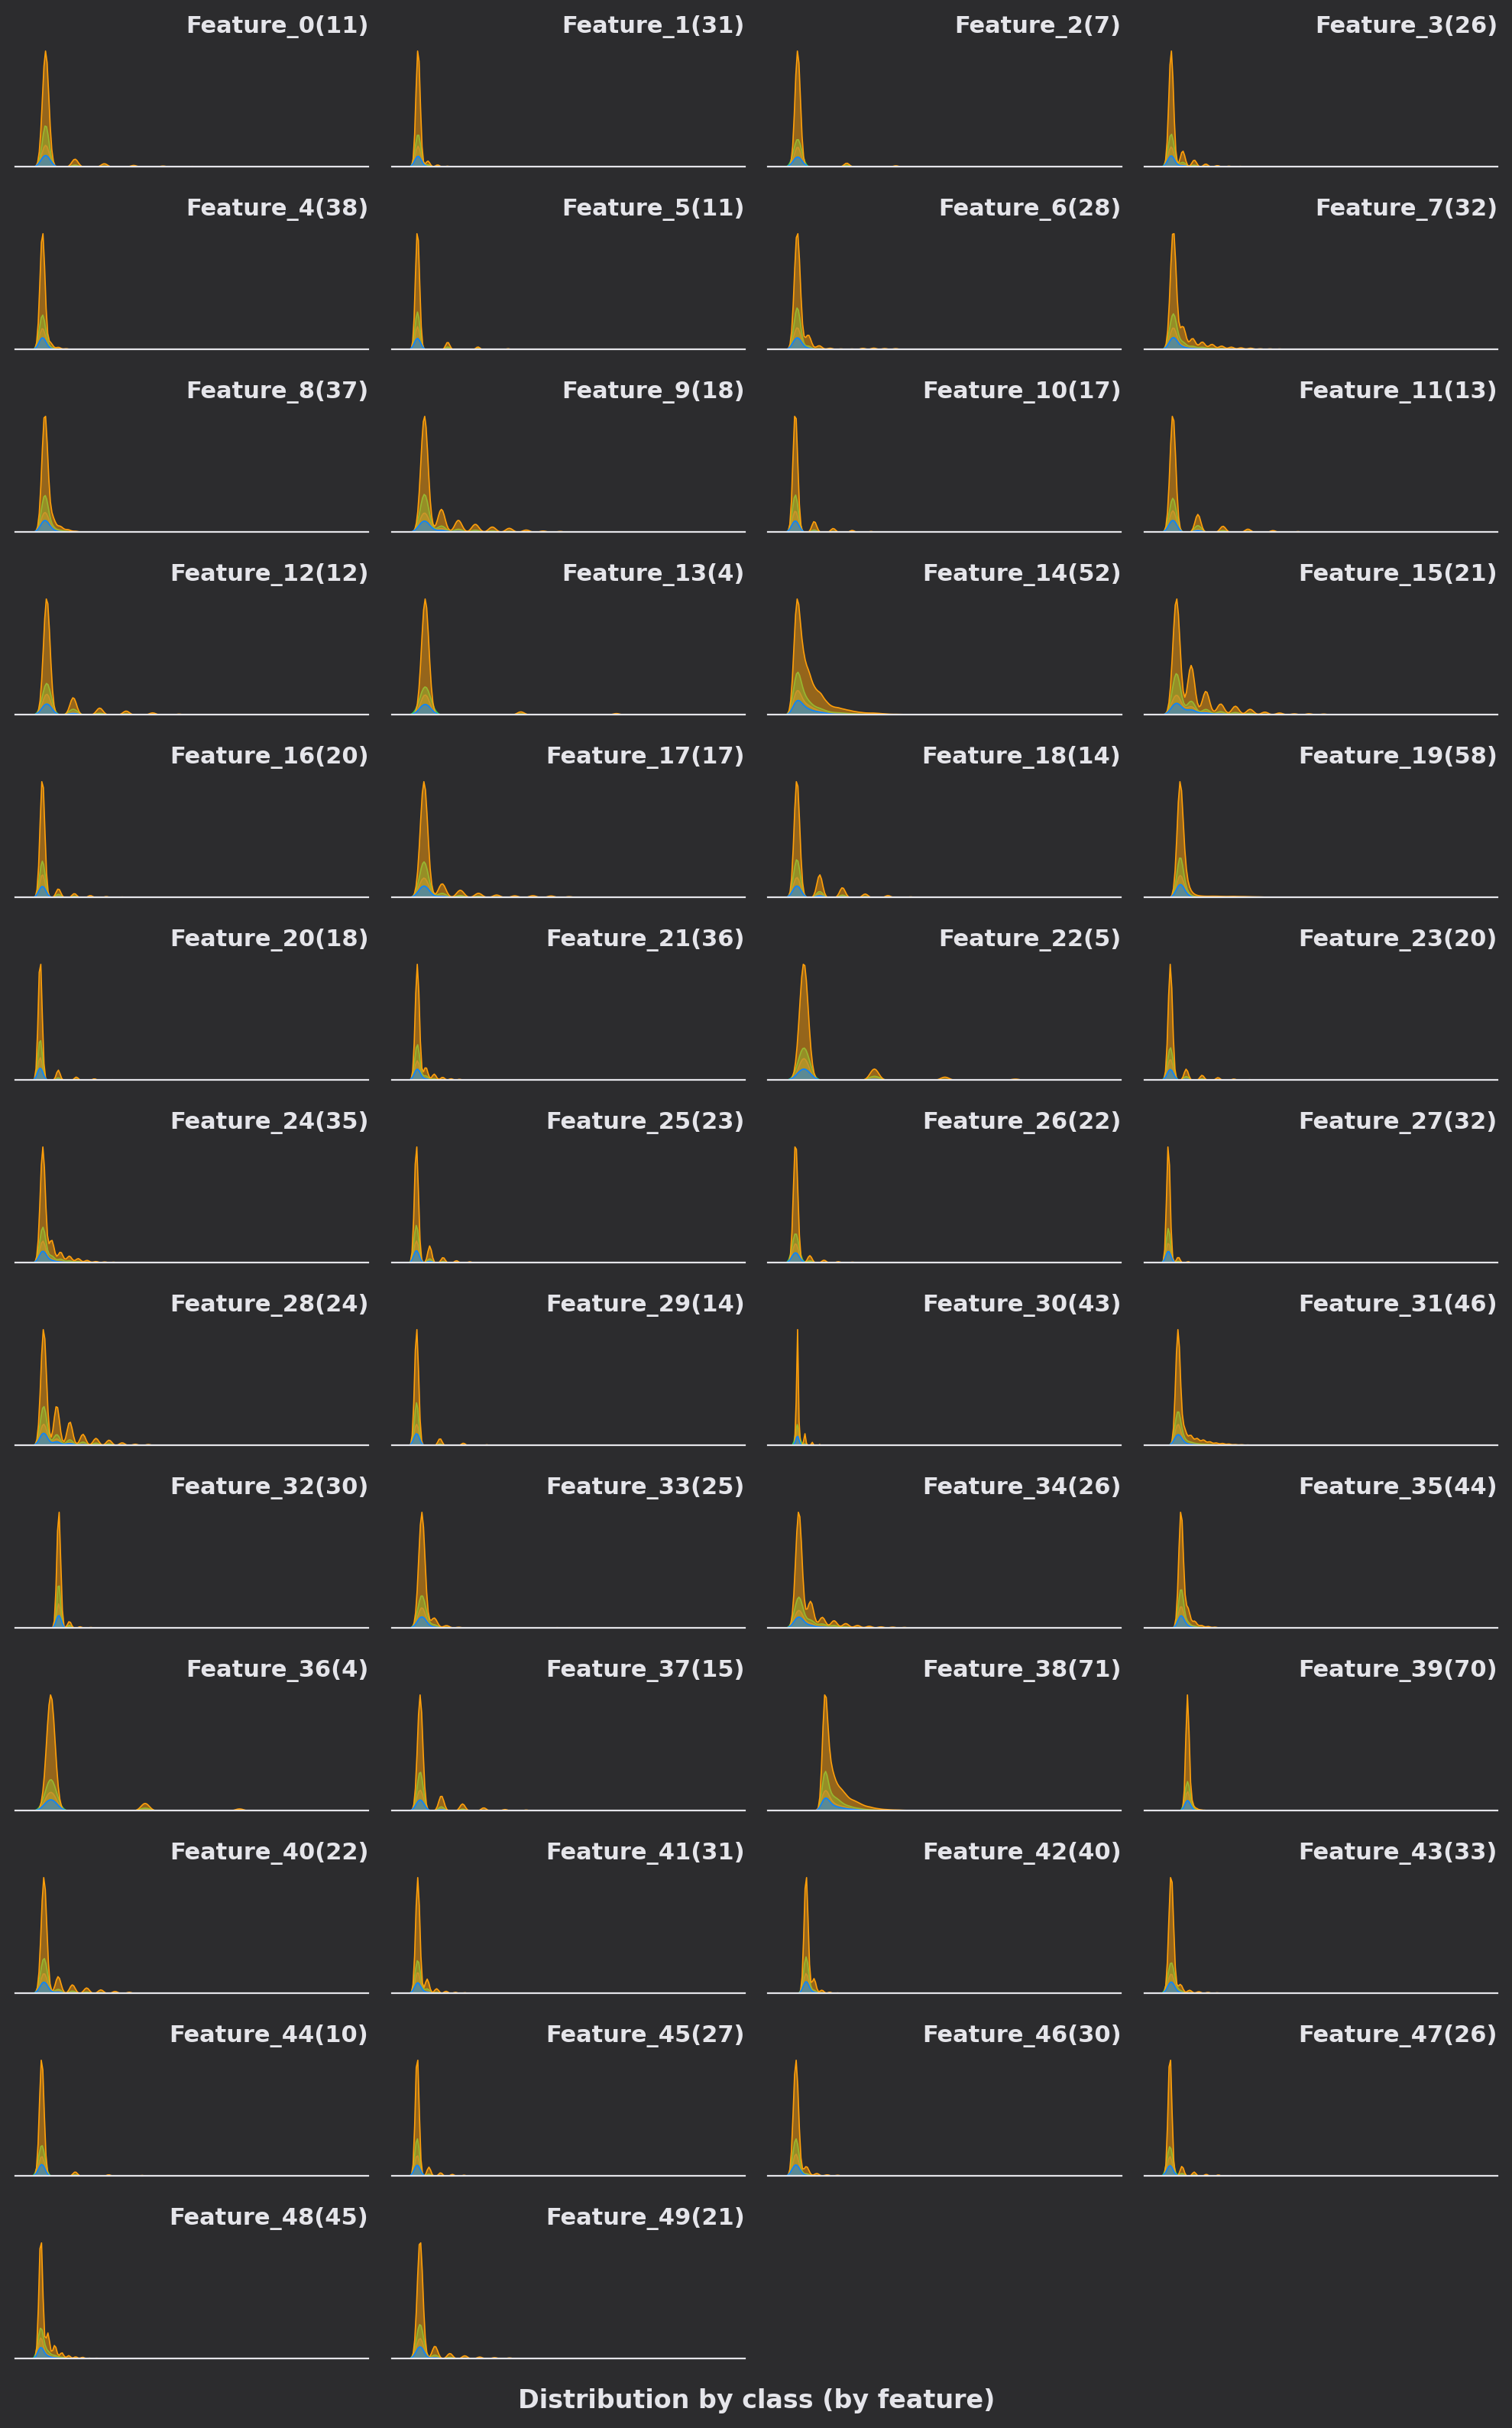

In [ ]:
fig, axes = plt.subplots(13, 4, figsize=(10, 16))

target_order = sorted(train['target'].unique())
for idx, ax in zip(range(50), axes.flatten()):
    cnt = train[f'feature_{idx}'].value_counts().sort_index()
    sns.kdeplot(x=f'feature_{idx}',
                hue='target', hue_order=target_order,
                data=train,
                alpha=0.5,
                linewidth=0.6, fill=True,
                legend=False,
                ax=ax)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    cnt = len(train[f'feature_{idx}'].unique())
    ax.set_title(f'Feature_{idx}({cnt})', loc='right', weight='bold', fontsize=11)

axes.flatten()[-1].axis('off')
axes.flatten()[-2].axis('off')

fig.supxlabel('Distribution by class (by feature)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

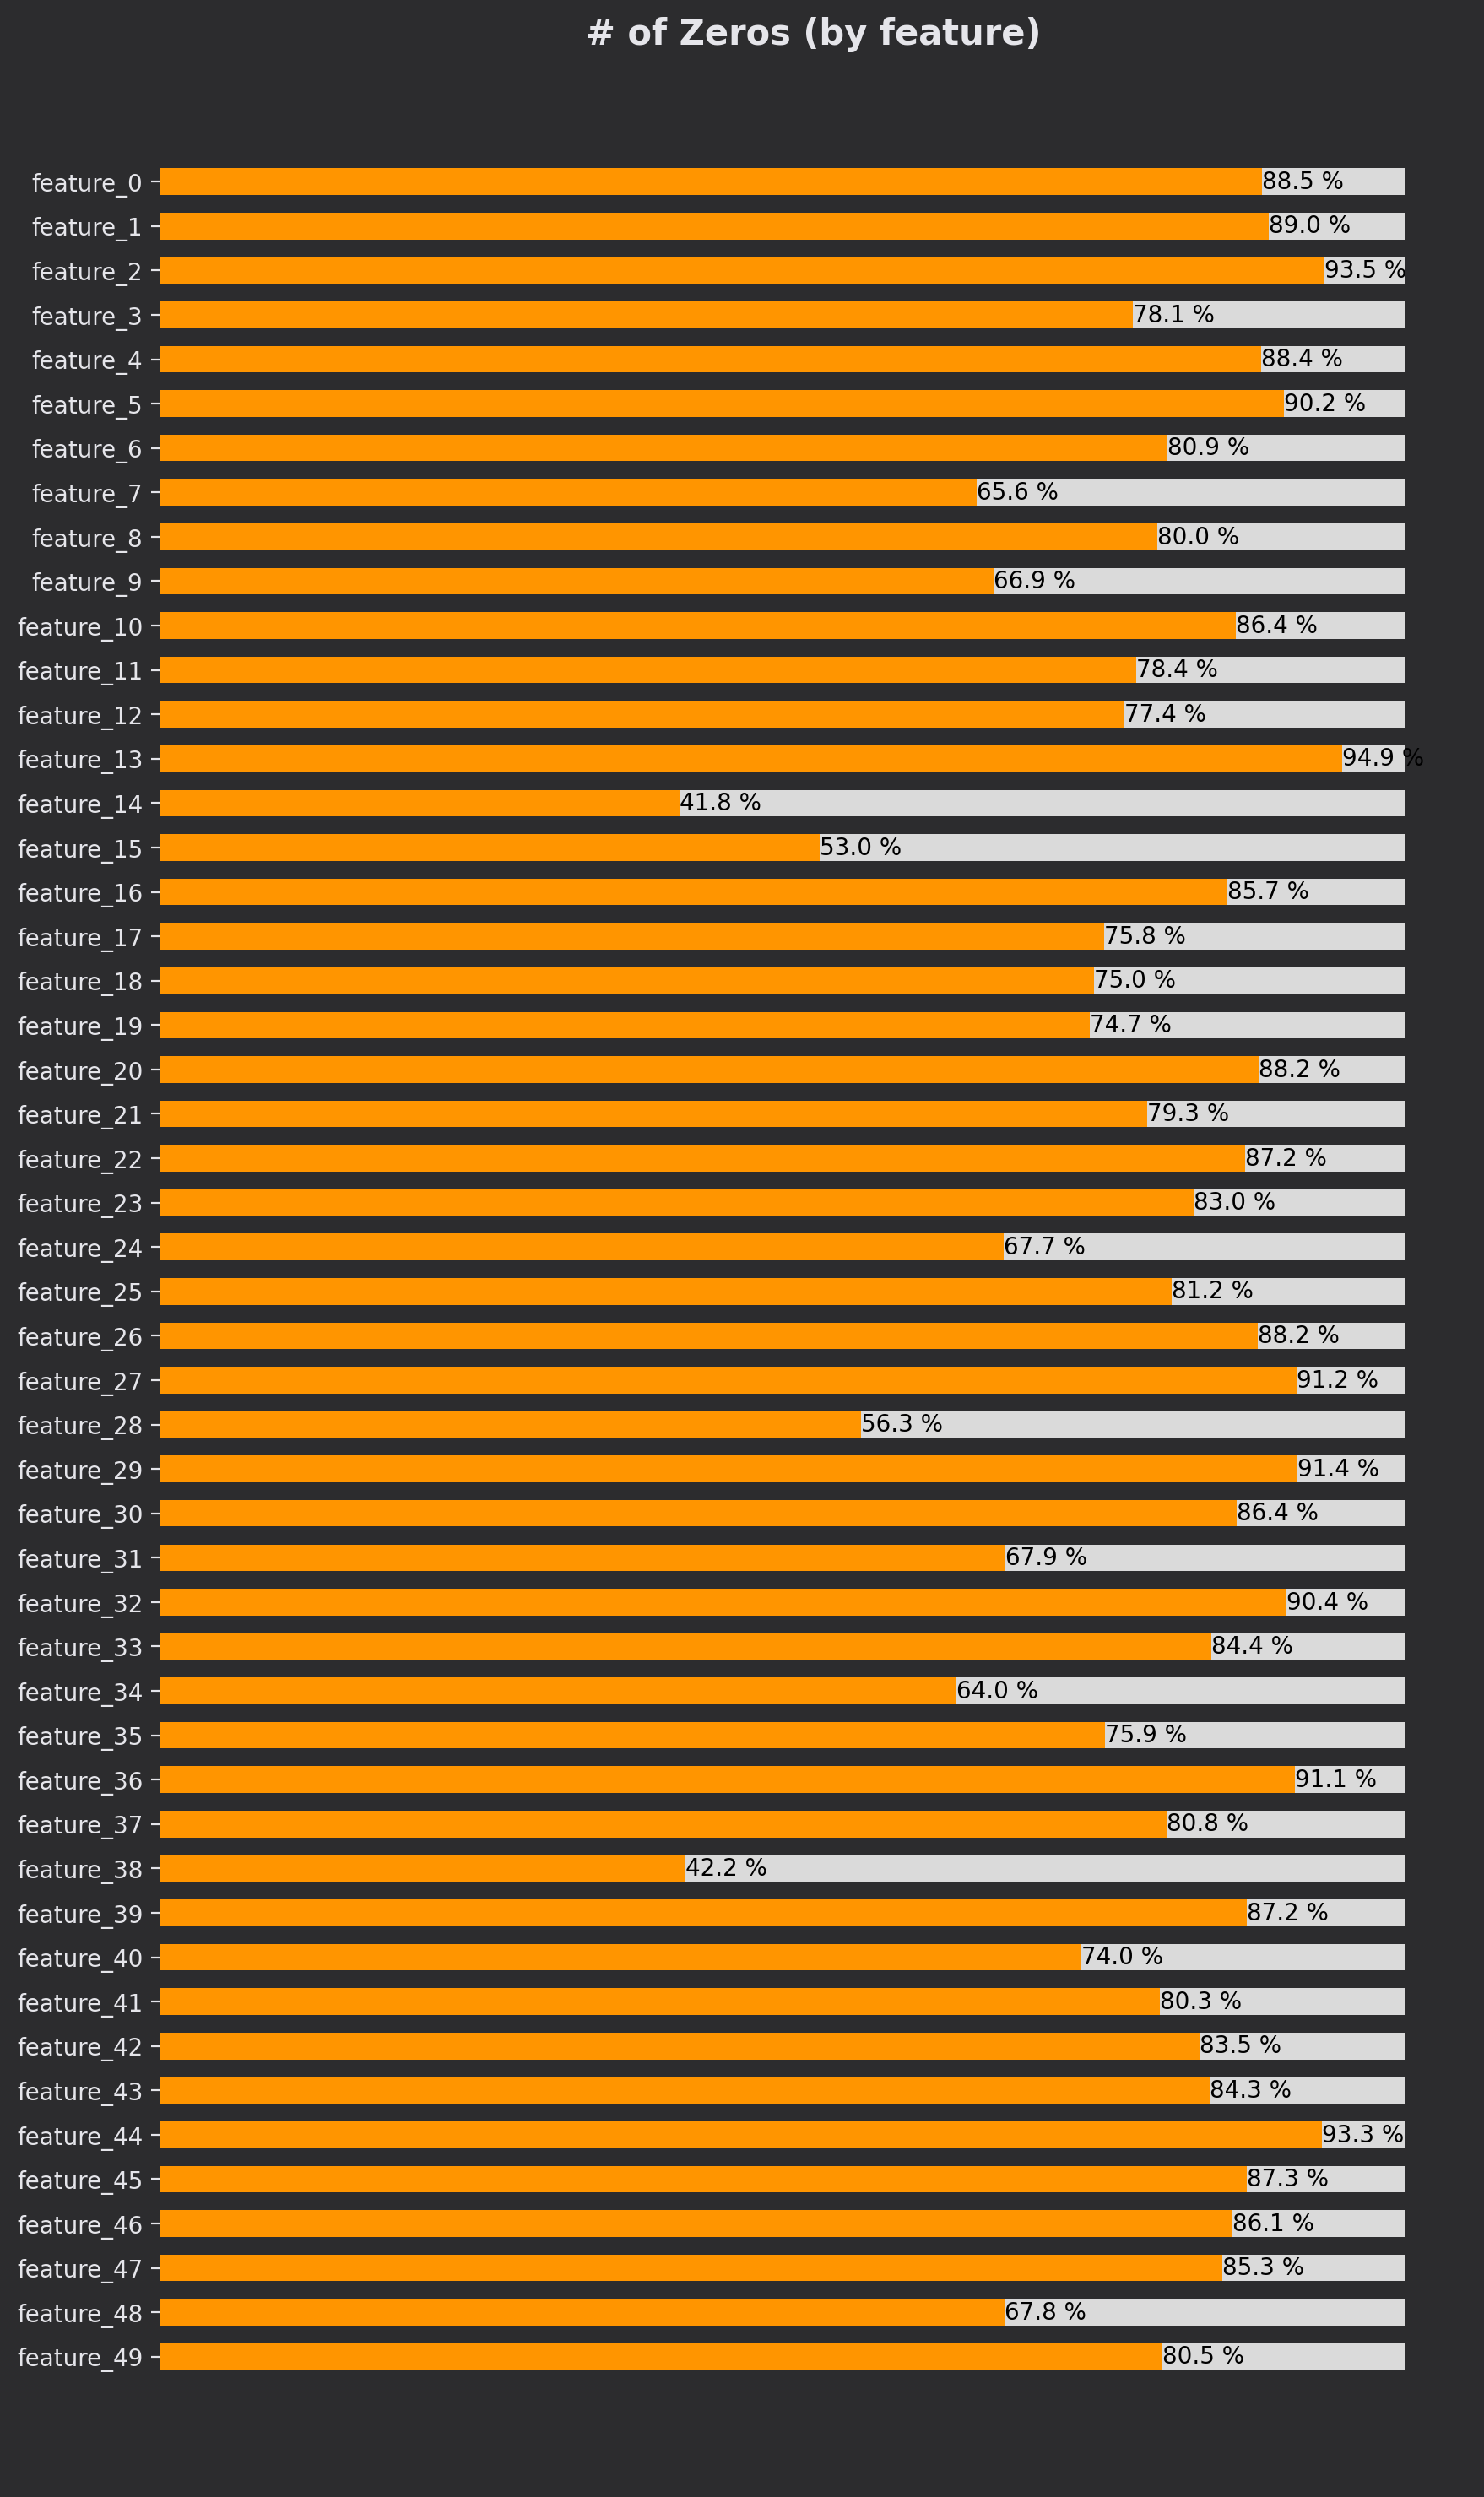

In [ ]:
zero_data = ((train.iloc[:,:50]==0).sum() / len(train) * 100)[::-1]
fig, ax = plt.subplots(1,1,figsize=(10, 19))

ax.barh(zero_data.index, 100, color='#dadada', height=0.6)
barh = ax.barh(zero_data.index, zero_data, color=light_palette[1], height=0.6)
ax.bar_label(barh, fmt='%.01f %%', color='black')
ax.spines[['left', 'bottom']].set_visible(False)

ax.set_xticks([])

ax.set_title('# of Zeros (by feature)', loc='center', fontweight='bold', fontsize=15)
plt.show()

All features are left skewed. And many features are 0, around 80%.

Handling this well may be a key.

There are obvious differences in mean when each feature is grouped by class.

However, the deviation is also that large. (Normalization can also yield significant deviations)

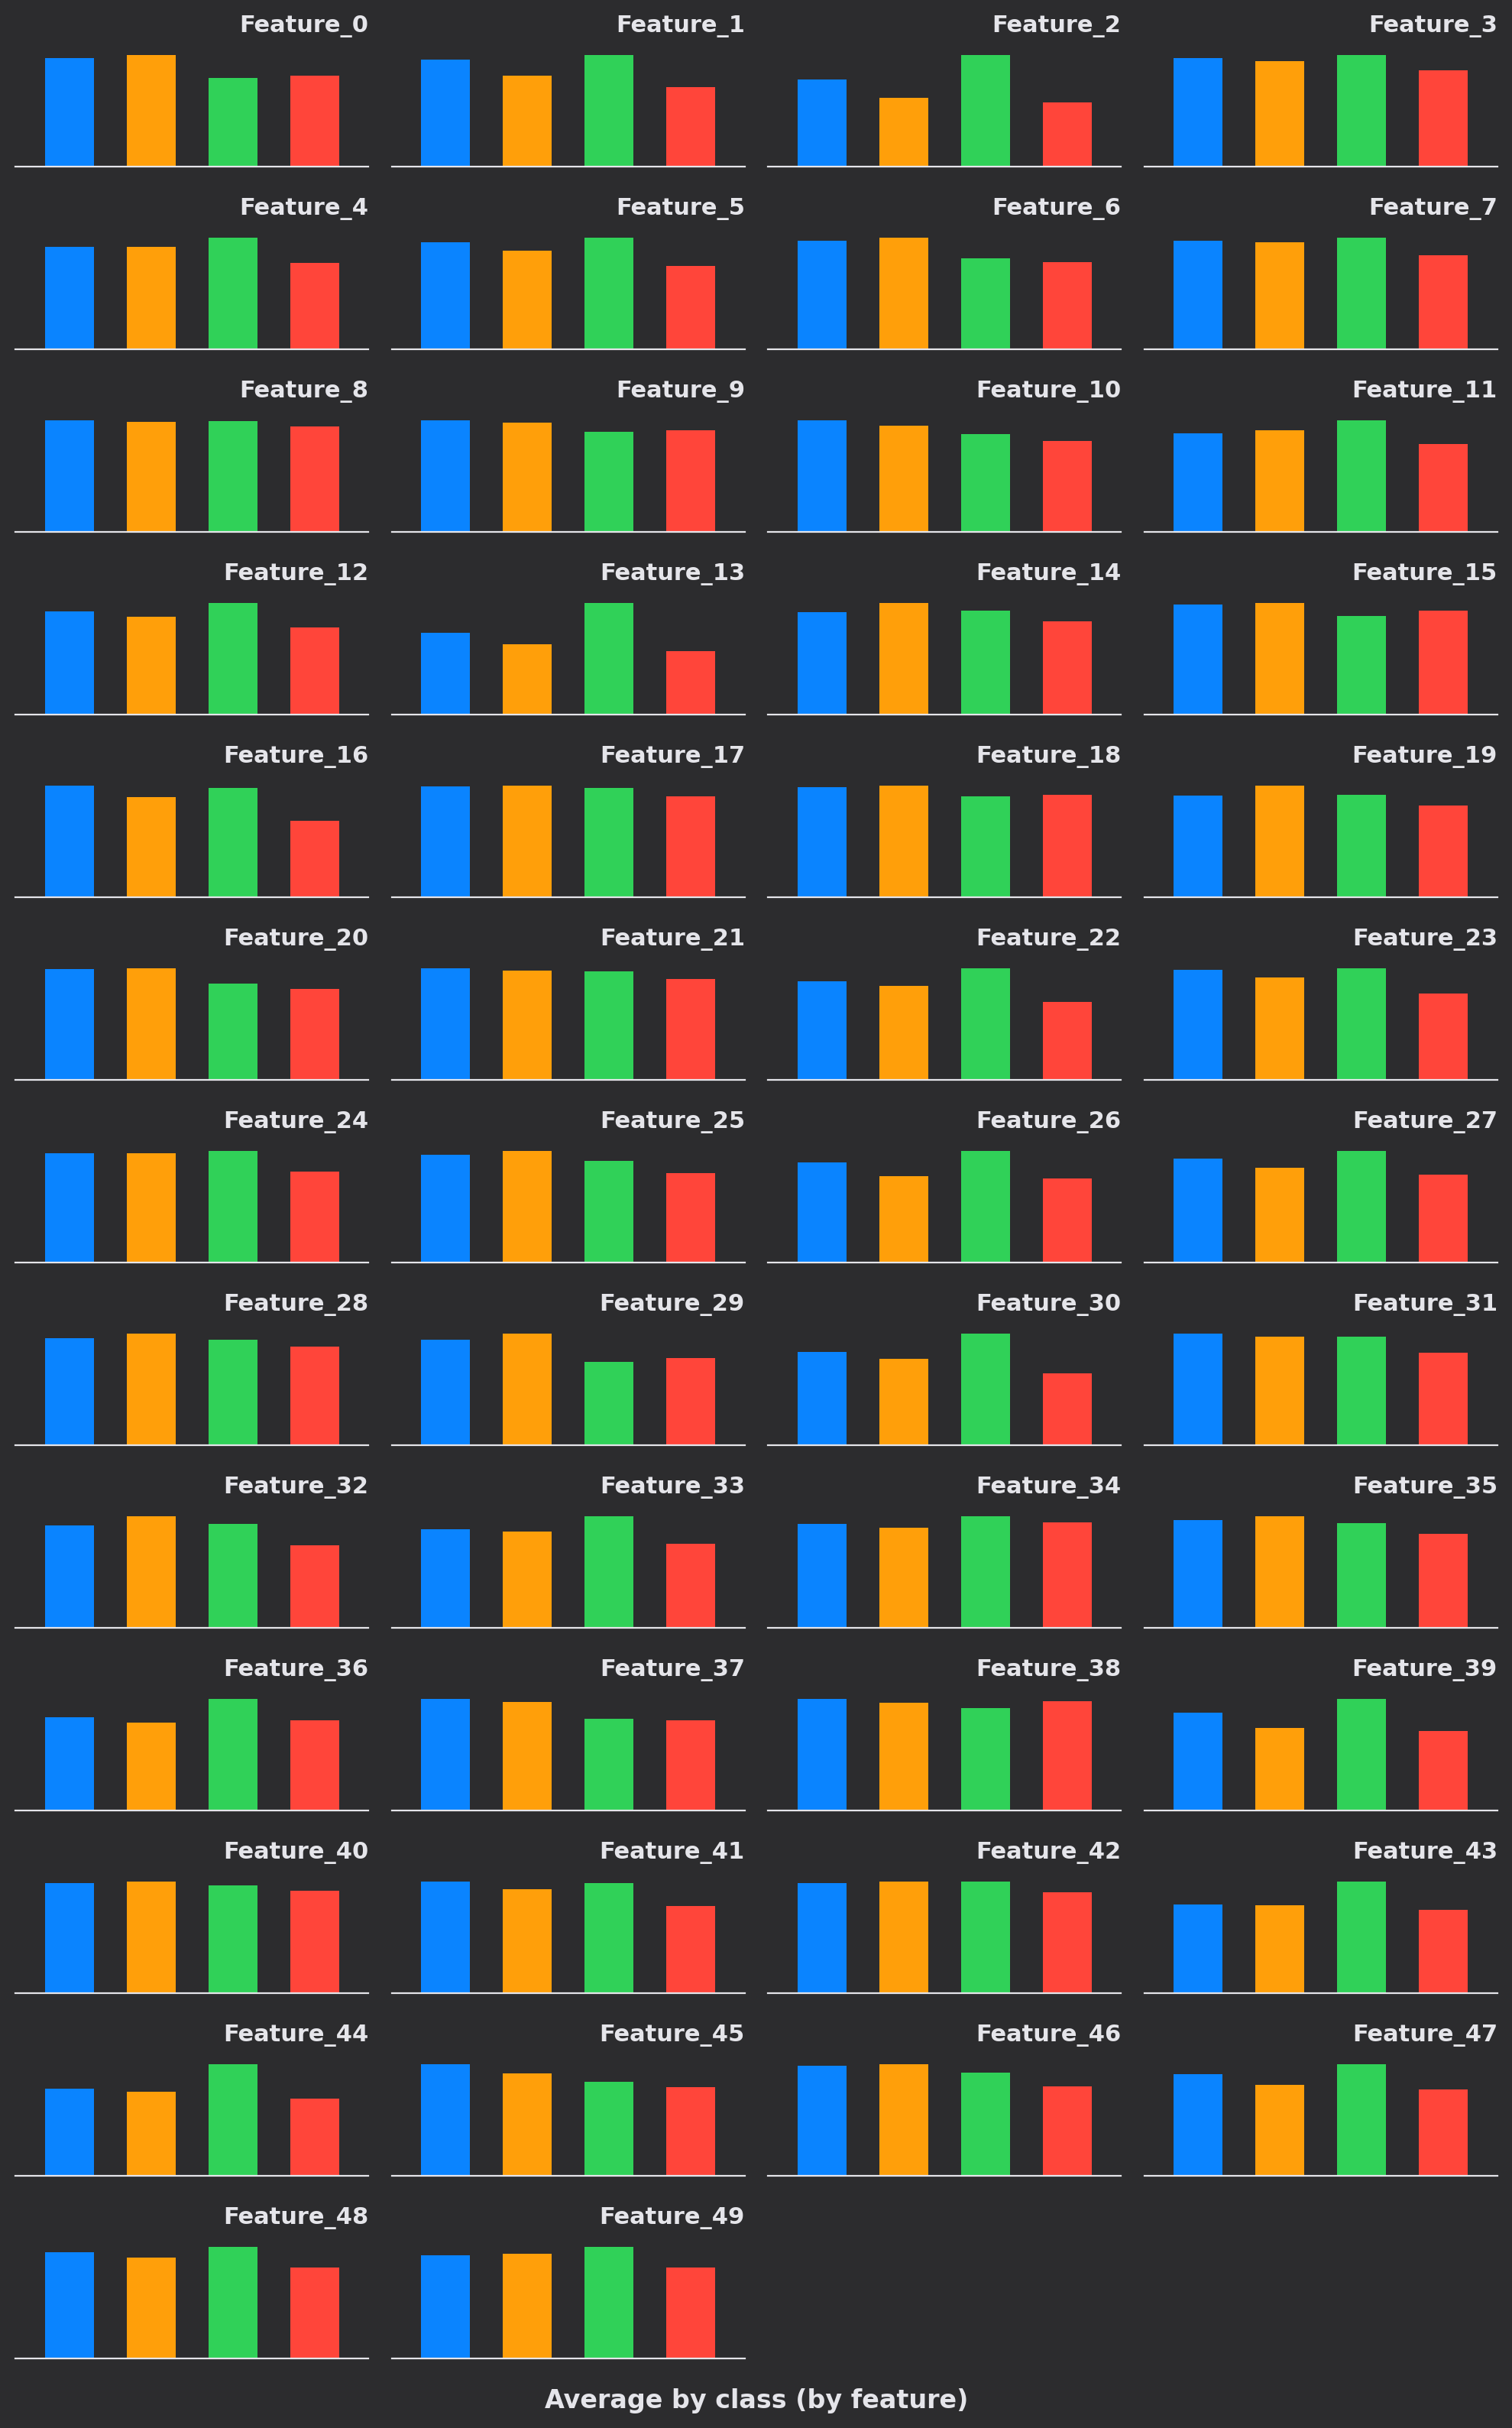

In [ ]:
fig, axes = plt.subplots(13, 4, figsize=(10, 16))

target_order = sorted(train['target'].unique())
mean = train.groupby('target').mean().sort_index()
std = train.groupby('target').std().sort_index()

for idx, ax in zip(range(50), axes.flatten()):
    ax.bar(mean[f'feature_{idx}'].index, mean[f'feature_{idx}'],
           color=dark_palette[:4], width=0.6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.margins(0.1)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'Feature_{idx}', loc='right', weight='bold', fontsize=11)

axes.flatten()[-1].axis('off')
axes.flatten()[-2].axis('off')

fig.supxlabel('Average by class (by feature)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

## Correlation

In [ ]:
label_dict = {val:idx for idx, val in enumerate(sorted(train['target'].unique()))}
train['target'] = train['target'].map(label_dict)

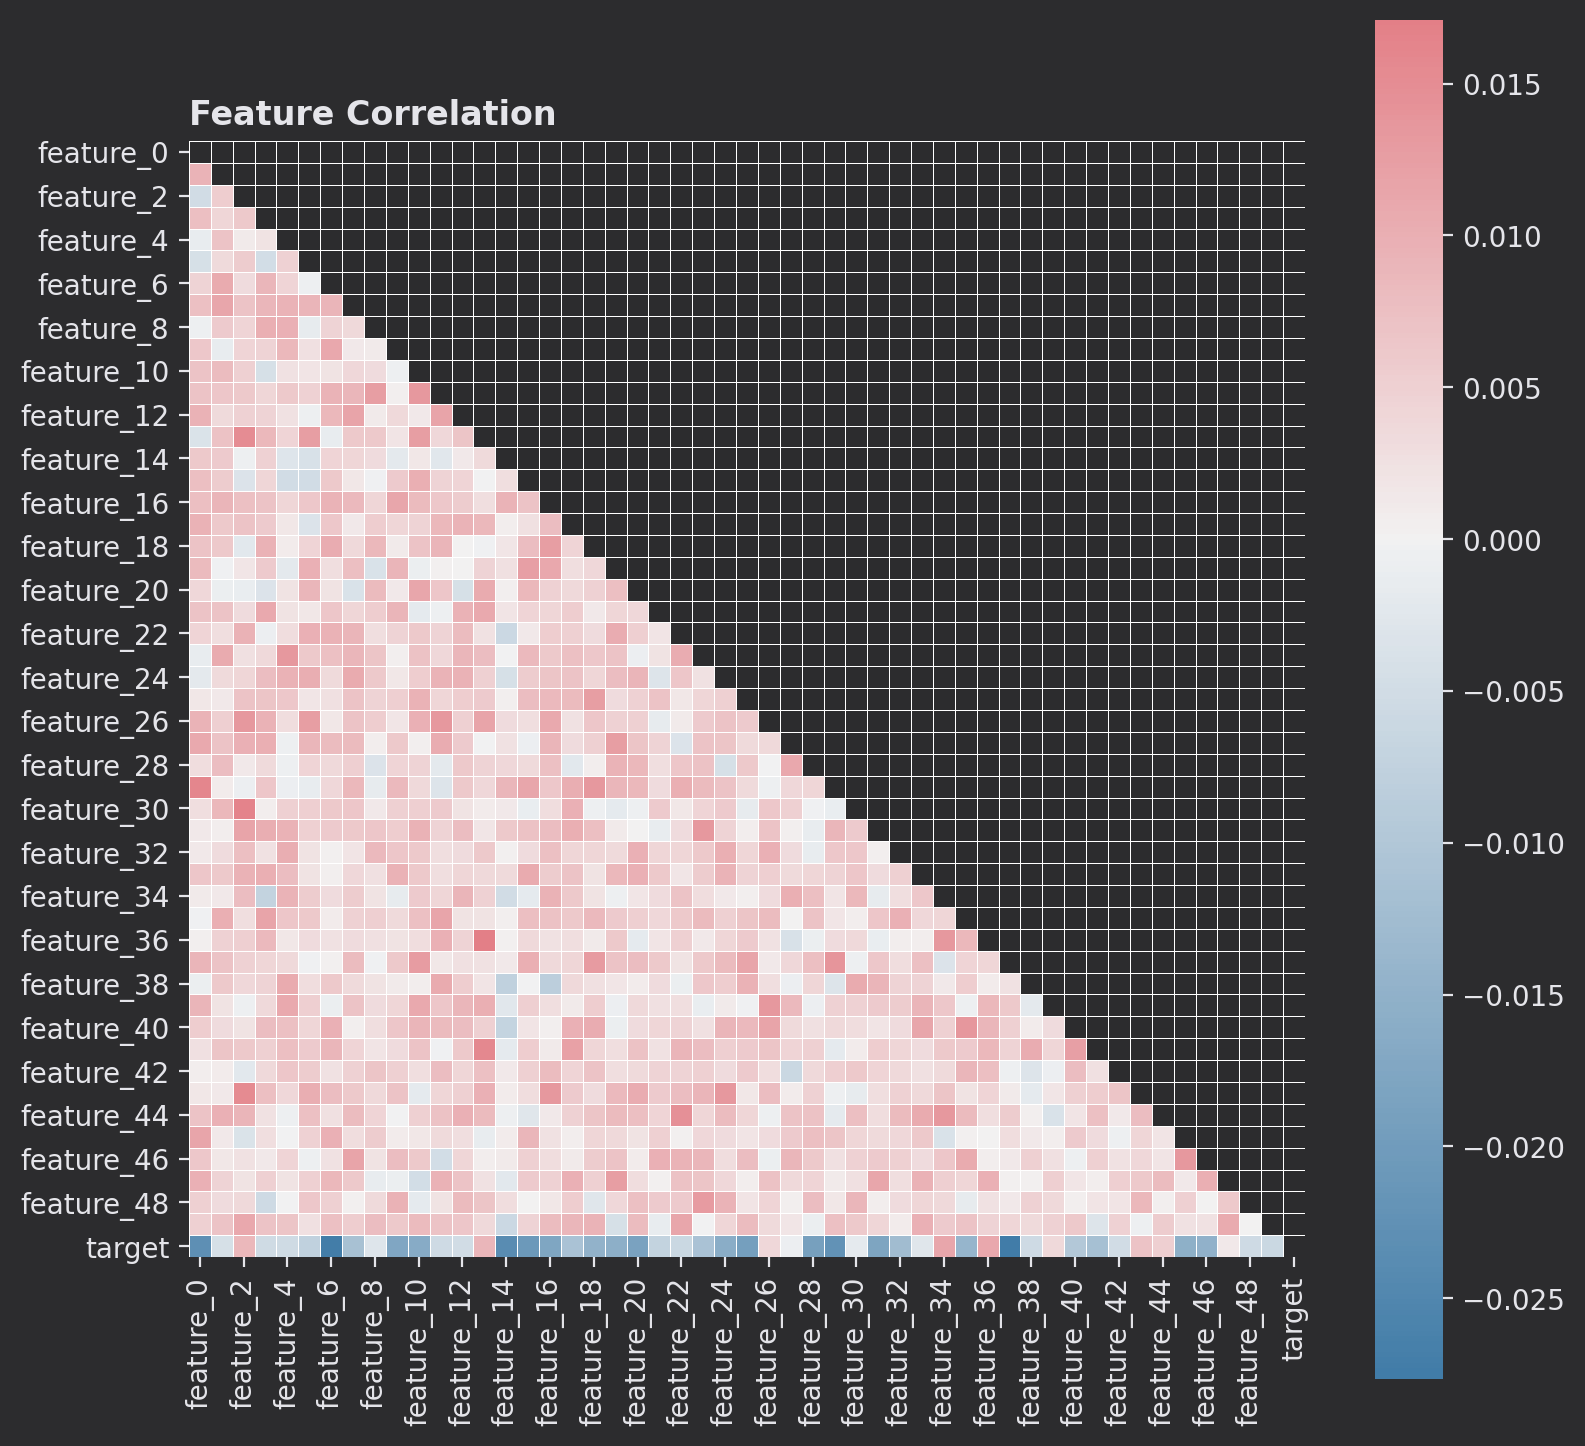

In [ ]:
fig, ax = plt.subplots(figsize=(9 , 9))

corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(corr,
        square=True, center=0, linewidth=0.2,
        cmap=sns.diverging_palette(240, 10, as_cmap=True),
        mask=mask, ax=ax)

ax.set_title('Feature Correlation', loc='left', fontweight='bold')
plt.show()

Most are weak correlations with a correlation of 0.02 or less.

## Dimension Reduction with Sampling

Let's look at meaningful clustering through dimension reduction.

Since there is a lot of data, we will use it by sampling only 10%.

I tried reducing the dimensions with UMAP.

In [ ]:
from umap import UMAP

train_sub = train.sample(10000, random_state=0)
target = train_sub['target']
umap = UMAP(random_state=0)
dr = umap.fit_transform(train_sub.iloc[:,:-1], target)

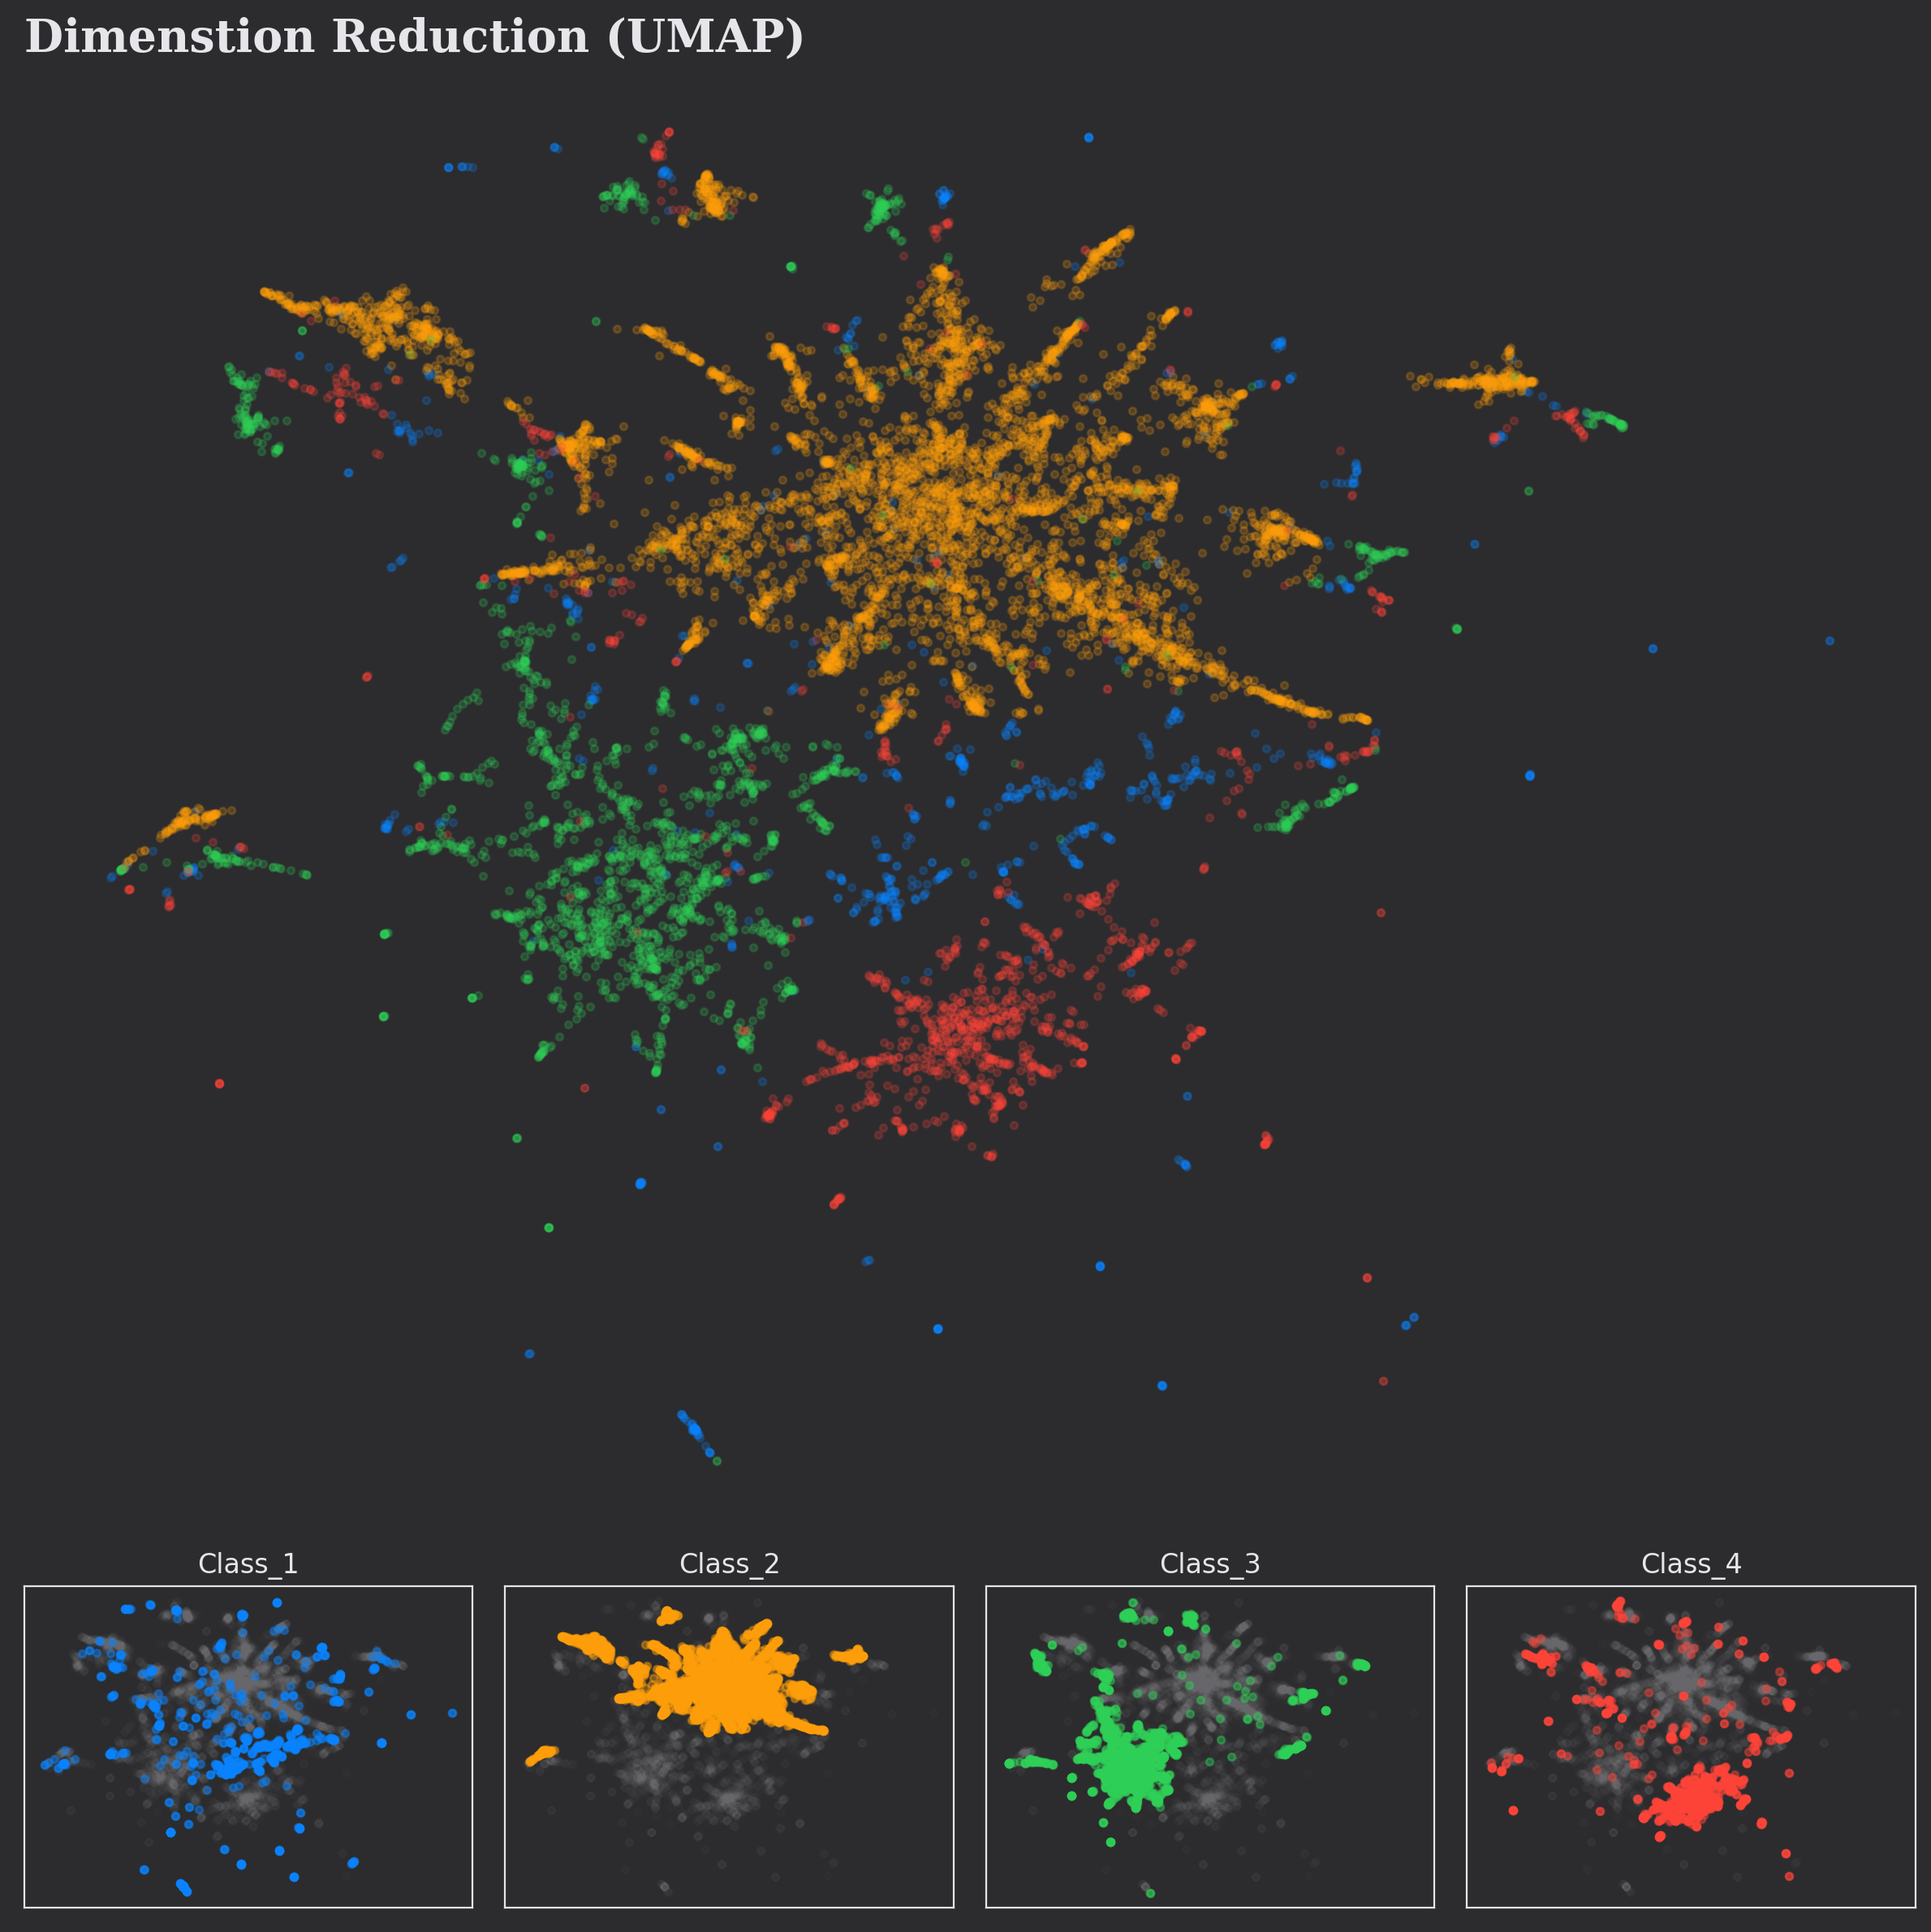

In [ ]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(5, 4)
ax = fig.add_subplot(gs[:-1,:])

sub_axes = [None] * 4
for idx in range(4):
    sub_axes[idx] = fig.add_subplot(gs[-1,idx])

for idx in range(4):
    ax.scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
              s=10, alpha=0.2
              )

    for j in range(4):
        sub_axes[j].scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
                              s=10, alpha = 0.4 if idx==j else 0.008, color = (dark_palette[j%9]) if idx==j else white_color,
                            zorder=(idx==j)
                           )


    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].set_title(f'Class_{idx+1}')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)

ax.set_title('Dimenstion Reduction (UMAP)', fontweight='bold', fontfamily='serif', fontsize=20, loc='left')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout()
plt.show()

- The dimensionality reduction has yielded quite meaningful results. I think you can get good results when modeling using this.
- Especially, since Class_2, which is an orange, occupies the largest number, we expect it to produce basic performance even if it can be classified well.

> It must be Kaggle's gift. It looks like fireworks.

### If the content is helpful, please upvote. :)